# Método Estocástico y Batch 
<br>
Importando los siguientes packetes:

In [1]:
import torch as pt
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt

### Codificación inicial:
**Prestar mucha atención a la forma como se genera un programa interno:**

In [12]:
class Data(Dataset):
    def __init__(self):
        self.x=pt.arange(-3,3,0.1).view(-1,1)
        self.f=-3*self.x+1
        self.y=self.f+0.45*pt.randn(self.x.size())
                
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return len(self.x)

Llamando al conjunto de datos con el nombre de `dataset`:

In [13]:
dataset= Data()

Creando funciones auxiliares:

In [28]:
def forward(w,x,b):
    y=w*x +b
    return y

In [15]:
def criterion(yhat,y):
    return pt.mean(pow(yhat-y,2))

En la función `DataLoader`, se selecciona el tamaño de partición a **1**:

In [14]:
trainloader= DataLoader(dataset=dataset,batch_size=1)

Definiendo los imputs:

In [25]:
wo=-30.0
bo=-2.0
lr=0.1

## Estocástico:

Este método solo consiste en iterar calculando la distancia en un solo punto. La función es la siguiente:

In [48]:
def est():
    w=pt.tensor(wo,requires_grad=True)
    b=pt.tensor(bo,requires_grad=True)
    for x,y in trainloader:
        yhat=forward(w,x,b)
        loss=criterion(yhat,y)
        loss.backward()
        w.data += -lr*w.grad.data
        b.data += -lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    return [float(w),float(b),float(loss.data)]

In [49]:
est()

[-5.229495525360107, 7.522709369659424, 0.061633747071027756]

In [50]:
print('Valores en una iteración:\nloss:{0}\nw:{1} , b:{2}'.format(est()[2],est()[0],est()[1]))

Valores en una iteración:
loss:0.061633747071027756
w:-5.229495525360107 , b:7.522709369659424


* Converge lentamente
* Menor coste computacional

## Batch:
Este método solo consiste en aplicar el método estocastico en iteradas veces. La función es la siguiente:

In [38]:
def batch(n):
    w=pt.tensor(wo,requires_grad=True)
    b=pt.tensor(bo,requires_grad=True)
    LOSS=[]
    Ws =[]
    Bs=[]
    for epoch in range(n):
        Ws.append(float(w.data))
        Bs.append(float(b.data))
        for x,y in trainloader:
            yhat=forward(w,x,b)
            loss=criterion(yhat,y)
            loss.backward()
            w.data += -lr*w.grad.data
            b.data += -lr*b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        LOSS.append(float(loss.data))
    return range(1,n+1),LOSS,Ws,Bs

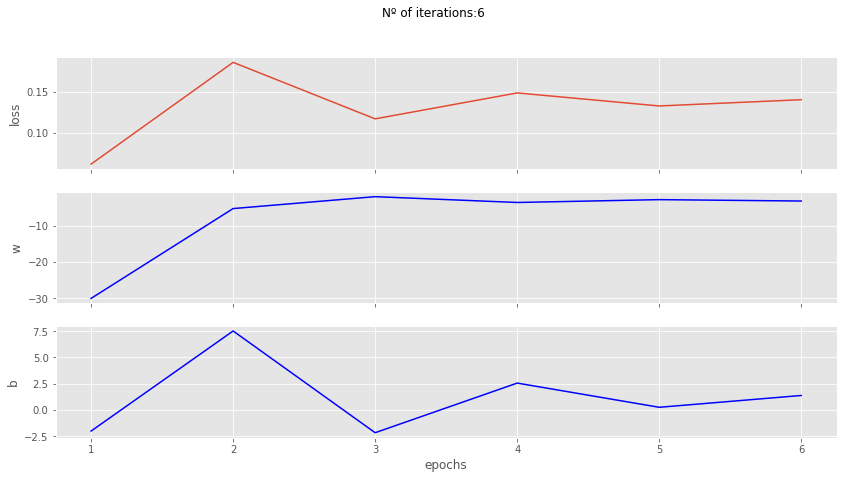

In [47]:
i,loss,W,B = batch(6)
fig,ax=plt.subplots(3,1,sharex=True,figsize=(14,7))
plt.style.use('ggplot')
ax[2].plot(i,B,color='blue')
ax[2].set( ylabel='b')
ax[1].plot(i,W,color='blue')
ax[1].set( ylabel='w')
ax[0].plot(i,loss)
ax[0].set( ylabel='loss') 
plt.xlabel('epochs')
plt.suptitle('Nº of iterations:{0}'.format(len(i)))
plt.show()

* Mejor precisión que el método Estocástico
* Un ligero mayor coste de cálculo

## Mini Batch:  

**El mejor método**:<br> Consiste en aplicar el método de Batch pero con sizes más grandes:

In [43]:
def batchsize(n,size):
    trainloader= DataLoader(dataset=dataset,batch_size=size)
    w=pt.tensor(wo,requires_grad=True)
    b=pt.tensor(bo,requires_grad=True)
    LOSS=[]
    Ws =[]
    Bs=[]
    for epoch in range(n):
        Ws.append(float(w.data))
        Bs.append(float(b.data))
        for x,y in trainloader:
            yhat=forward(w,x,b)
            loss=criterion(yhat,y)
            loss.backward()
            w.data += -lr*w.grad.data
            b.data += -lr*b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        LOSS.append(float(loss.data))
    return range(1,n+1),LOSS,Ws,Bs

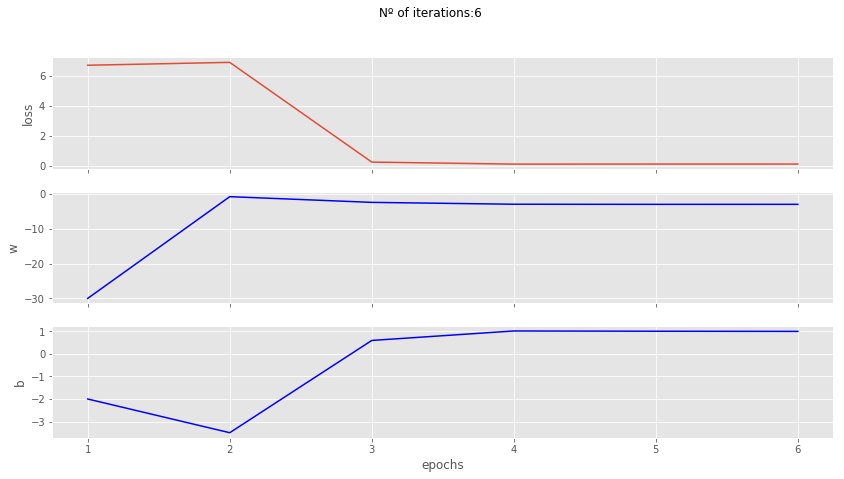

In [46]:
i,loss,W,B = batchsize(6,10)
fig,ax=plt.subplots(3,1,sharex=True,figsize=(14,7))
plt.style.use('ggplot')
ax[2].plot(i,B,color='blue')
ax[2].set( ylabel='b')
ax[1].plot(i,W,color='blue')
ax[1].set( ylabel='w')
ax[0].plot(i,loss)
ax[0].set( ylabel='loss') 
plt.xlabel('epochs')
plt.suptitle('Nº of iterations:{0}'.format(len(i)))
plt.show()

* Mejor precisión
* Un ligero coste computacional